In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    precision_recall_curve
)

In [3]:
X_train = np.load("data/X_train_unscaled.npy")
X_test = np.load("data/X_test_unscaled.npy")
y_train = np.load("data/y_train.npy")
y_test = np.load("data/y_test.npy")

In [5]:
# Computing scale_pos_weight
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos

scale_pos_weight

1.9268761625411361

In [7]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

In [9]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

In [11]:
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]

In [13]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

print("XGBoost Performance Metrics")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1-score  : {f1:.4f}")
print(f"ROC-AUC   : {roc:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Background", "Signal"]))

XGBoost Performance Metrics
Accuracy  : 1.0000
Precision : 0.9999
Recall    : 1.0000
F1-score  : 1.0000
ROC-AUC   : 1.0000

Classification Report:

              precision    recall  f1-score   support

  Background       1.00      1.00      1.00    107736
      Signal       1.00      1.00      1.00     55912

    accuracy                           1.00    163648
   macro avg       1.00      1.00      1.00    163648
weighted avg       1.00      1.00      1.00    163648



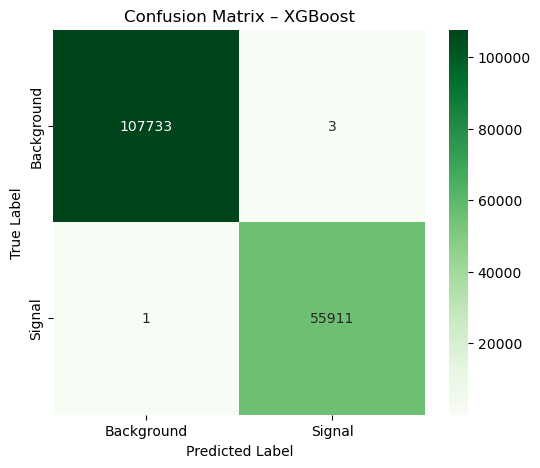

In [17]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=["Background", "Signal"],
    yticklabels=["Background", "Signal"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – XGBoost")

plt.savefig("results/figures/xgb_confusion_matrix.png", bbox_inches="tight")
plt.show()

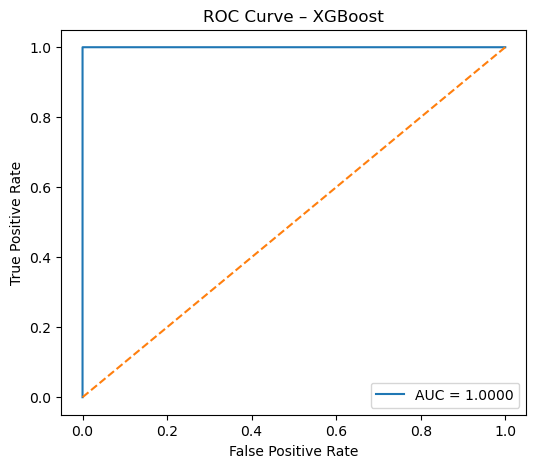

In [23]:
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – XGBoost")
plt.legend()

plt.savefig("results/figures/xgb_roc_curve.png", bbox_inches="tight")
plt.show()

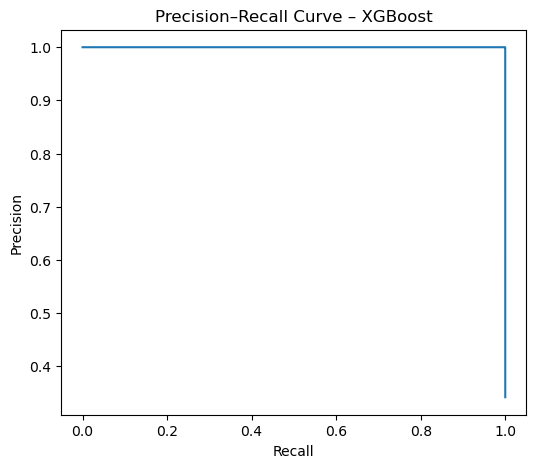

In [25]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – XGBoost")

plt.savefig("results/figures/xgb_pr_curve.png", bbox_inches="tight")
plt.show()

In [27]:
xgb_results = {
    "Model": "XGBoost",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1": f1,
    "ROC_AUC": roc
}

xgb_results

{'Model': 'XGBoost',
 'Accuracy': 0.9999755572937036,
 'Precision': 0.9999463461744822,
 'Recall': 0.9999821147517528,
 'F1': 0.9999642301432583,
 'ROC_AUC': 0.9999999985059105}